<a href="https://colab.research.google.com/github/franceslawley/Exploratory_Data_Analysis_Project/blob/main/Lawley_Frances_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Introduction**

Sunday laws (Blue laws) originally banned alcohol sales on Sundays to protect worker’s families and to observe a day of rest.

Though not enforced equally across the United States, many participated in strict prohibited Sunday sales while other states permitted local breweries for carryout. 

This dataset can be used to analyze the correlation between different types of Sunday Sales and an increase in DUI or vehicle-related fatalities due to alcohol.**bold text**

Link to original dataset: https://www.kaggle.com/bryanmaloney/dui-arrests-and-population-by-state-2015-usa



###**Part 1: Select and Prepare the Data**

In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter
import seaborn as sb

dui = pd.DataFrame(pd.read_csv("DUI.csv", index_col=0))                         #import dataset from CSV
dui.columns = ['DUI', 'Fatalities', 'Population', 'Sunday_Sales']               #rename columns                
dui.head()

,DUI,Fatalities,Population,Sunday_Sales
State,,,,
Alabama,7863,247,4858979,Prohibited
Alaska,3163,24,738432,Permitted
Arizona,22367,272,6828065,Permitted
Arkansas,6919,149,2978204,Local
California,141458,914,39144818,Permitted


In [3]:
#Data Wrangling

#Create new column "Population_Class"
#Divide into high population (population above median 4,547,908) and low population (below median)
dui['Population_Class'] = np.where((dui['Population'] > dui['Population'].median()), 'High Population', 'Low Population')
dui.head()

,DUI,Fatalities,Population,Sunday_Sales,Population_Class
State,,,,,
Alabama,7863,247,4858979,Prohibited,High Population
Alaska,3163,24,738432,Permitted,Low Population
Arizona,22367,272,6828065,Permitted,High Population
Arkansas,6919,149,2978204,Local,Low Population
California,141458,914,39144818,Permitted,High Population


In [4]:
#Data Wrangling

#Create new column "Region"
#Divide based on region lists
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']
south = ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'Kentucky', 'North Carolina', 'South Carolina', 'Tennessee', 'Georgia','Florida', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Texas', 'Oklahoma']
west = ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska','Hawaii']
midwest = ['Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Illinois', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']

dui['Region'] = "null"
for i,row in dui.iterrows():
  if i in west:
    dui.loc[i,'Region'] = 'West'
  if i in midwest:
    dui.loc[i,'Region'] = 'Midwest'
  if i in northeast:
    dui.loc[i,'Region'] = 'Northeast'
  if i in south:
    dui.loc[i,'Region'] = 'South'

In [5]:
#Data Wrangling

#Create new column "Death Rate" = Fatalities / Population
dui['Death_Rate']=dui['Fatalities']/dui['Population']

In [6]:
#Sort in ascending order for graphing
dui = dui.sort_values('DUI')

In [7]:
#Remove California outlier based on highest DUIs
dui_remove_outliers = dui[dui.index!='California']

In [8]:
#Remove top 2 outliers based on highest DUIs (California and Texas)
dui_remove_two_outliers = dui[dui['DUI']<=60000]

###**Initial Inquiries**

Sunday Sales: Are DUIs higher in areas with permitted Sunday Sales compared to any other type of Sunday Sale (local, restricted, prohibited)?

Population: How can different levels of population relate to the number of DUIs and vehicle-related deaths due to alcohol?

Region: Are DUIs higher in states of a certain region? Based on region, is it likely DUIs and alcohol-related deaths will be higher?

###**Part 2: Exploratory Analysis**

In [ ]:
#Data Visualization and Exploration

#Let's look at the DUI distribution
plt.figure(figsize=(20,10))
plt.grid(False)
sb.distplot(x=dui.DUI, bins=10)
plt.xlabel('DUI')
plt.ylabel('Count')
plt.title('DUI Distribution', size=15)
plt.show()

#Describe graph
dui.DUI.describe()

#Average number of DUIs is 17,317
#Most of the DUIs range from 0 to 27,500
#50% of states have less than 8,916 DUIs

In [ ]:
#Bar Chart of total DUIs by State

plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.set_size_inches(20,10) 

for s in dui.index:
  ax.bar(s, dui['DUI'][s])
ax.set_ylabel("DUIs")
ax.set_xlabel("State")
ax.set_title("Total DUIs by State", size = 15)
fig.autofmt_xdate(rotation=90)
plt.show()

dui.DUI.describe()

#California, Texas, and Pennsylvania yield the highest number of DUIs
#Delaware, Vermont, Rhode Island yield the lowest number of DUIs
#California is the main outlier at max DUI of 141,458

In [ ]:
#What if we remove the highest California outlier?
#Bar Chart of total DUIs by State

dui_remove_outliers = dui[dui.index!='California']
fig, ax = plt.subplots()
fig.set_size_inches(20,10) 

#Bar Chart of total DUIs by State (without outlier)
for s in dui_remove_outliers.index:
  ax.bar(s, dui_remove_outliers['DUI'][s])
ax.set_ylabel("DUIs")
ax.set_xlabel("State")
ax.set_title("Total DUIs by State")
fig.autofmt_xdate(rotation=90)
plt.show()

dui_remove_outliers.DUI.describe()

#Removing California as an outlier significantly lowers standard deviation from 21914 to 12752
#Average DUIs also lowers from 17317 to only 14784
#We can see more of the distribution without the California outlier
#Texas receives the second highest DUIs at 64,971

###**Hypothesis 1**

I hypothesize that there is a correlation between states with higher populations and the amount of DUIs reported by drunk drivers.

I hypothesize that there is a correlation between death rate per population and the number of DUIs.


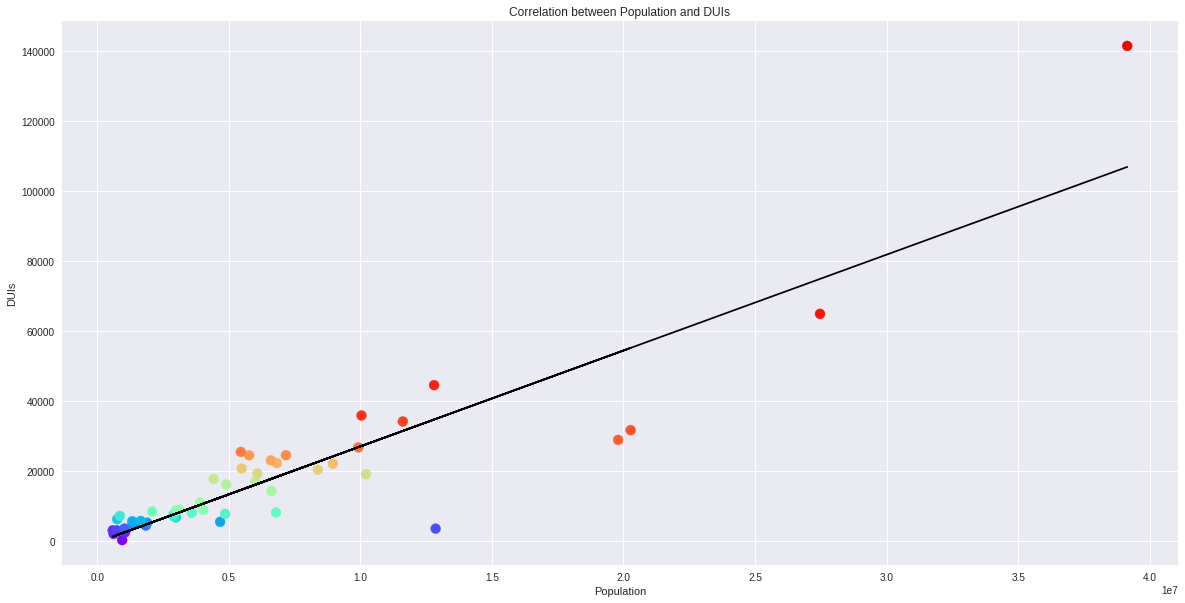

(0.9028849759179716, 3.178718762098287e-19)

In [66]:
#Plot correlation between Population and total DUIs

plt.style.use('seaborn')

x = np.arange(50)
ys = [i+x+(i*x)**2 for i in range(50)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))                                 #Set rainbow colors

plt.figure(figsize=(20,10))
plt.scatter(dui.Population, dui.DUI, s= 100, c = colors)
plt.xlabel('Population')
plt.ylabel('DUIs')
plt.title('Correlation between Population and DUIs')

m, b = np.polyfit(dui.Population, dui.DUI, 1)
plt.plot(dui.Population, m*dui.Population + b, color = 'k')                     #Plot line of best fit

plt.show()

stats.pearsonr(dui['Population'], dui['DUI'])     #Calculate statistics (correlation coefficient, p-value)
#There is a strong positive (close to 1) and significant correlation between Population and number of DUIs.
#With a p-value less than 0.5, we can are confident to reject the null hypothesis and accept the alternate hypothesis that there is a correlation between Population and DUIs

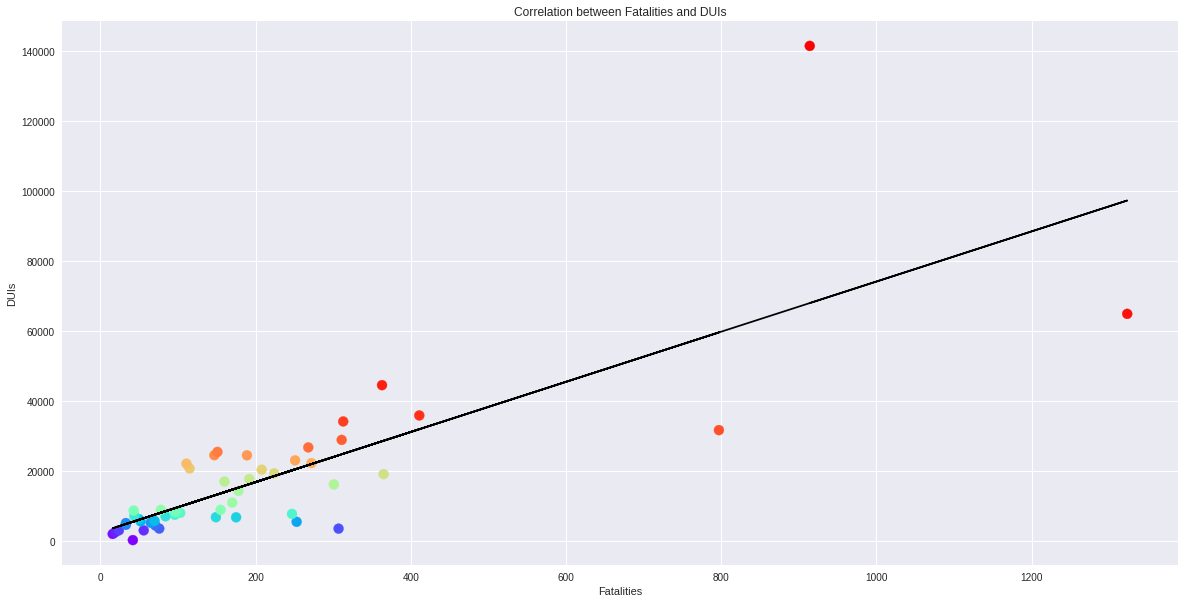

(0.7734952553713388, 4.5574345730745174e-11)

In [67]:
#Plot correlation between Population and total DUIs

plt.style.use('seaborn')

x = np.arange(50)
ys = [i+x+(i*x)**2 for i in range(50)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))                                 #Set rainbow colors

plt.figure(figsize=(20,10))
plt.scatter(dui.Fatalities, dui.DUI, s = 100, c = colors)
plt.xlabel('Fatalities')
plt.ylabel('DUIs')
plt.title('Correlation between Fatalities and DUIs')

m, b = np.polyfit(dui.Fatalities, dui.DUI, 1)
plt.plot(dui.Fatalities, m*dui.Fatalities + b, color = 'k')                     #Plot line of best fit

plt.show()
stats.pearsonr(dui['Fatalities'], dui['DUI'])     #Calculate statistics (correlation coefficient, p-value)
#There is a strong positive and significant correlation between Fatalities and number of DUIs.
#With a p-value less than 0.5, we can are confident to reject the null hypothesis and accept the alternate hypothesis that there is a correlation between Fatalities and DUIs

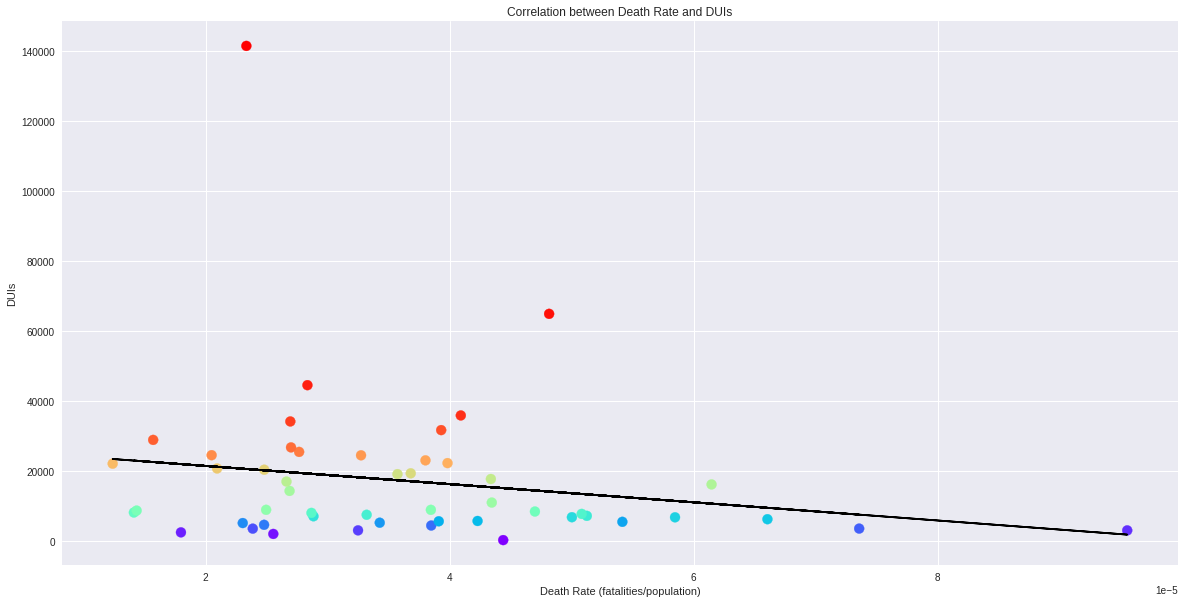

(0.7734952553713388, 4.5574345730745174e-11)

In [69]:
#Plot correlation between Death Rate and Population

plt.style.use('seaborn')

x = np.arange(50)
ys = [i+x+(i*x)**2 for i in range(50)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))                                 #Set rainbow colors

plt.figure(figsize=(20,10))
death_rate = dui.Fatalities/dui.Population     #set death rate equal to fatalities/population
plt.scatter(death_rate, dui.DUI, s = 100, c = colors)
plt.xlabel('Death Rate (fatalities/population)')
plt.ylabel('DUIs')
plt.title('Correlation between Death Rate and DUIs')
m, b = np.polyfit(death_rate, dui.DUI, 1)
plt.plot(death_rate, m*death_rate + b, color = 'k')                             #Plot line of best fit

plt.show()

stats.pearsonr(dui['Fatalities'], dui['DUI'])
#Based on the statistics, there is a strong positive and significant correlation between Death Rate (fatalities/population) and number of DUIs.
#With a p-value still less than 0.5, we can are confident to reject the null hypothesis and accept the alternate hypothesis that there is a correlation between Death Rate and DUIs
#However, the graph shows a downward trend, indicating a negative correlation – Why? (further analysis below)

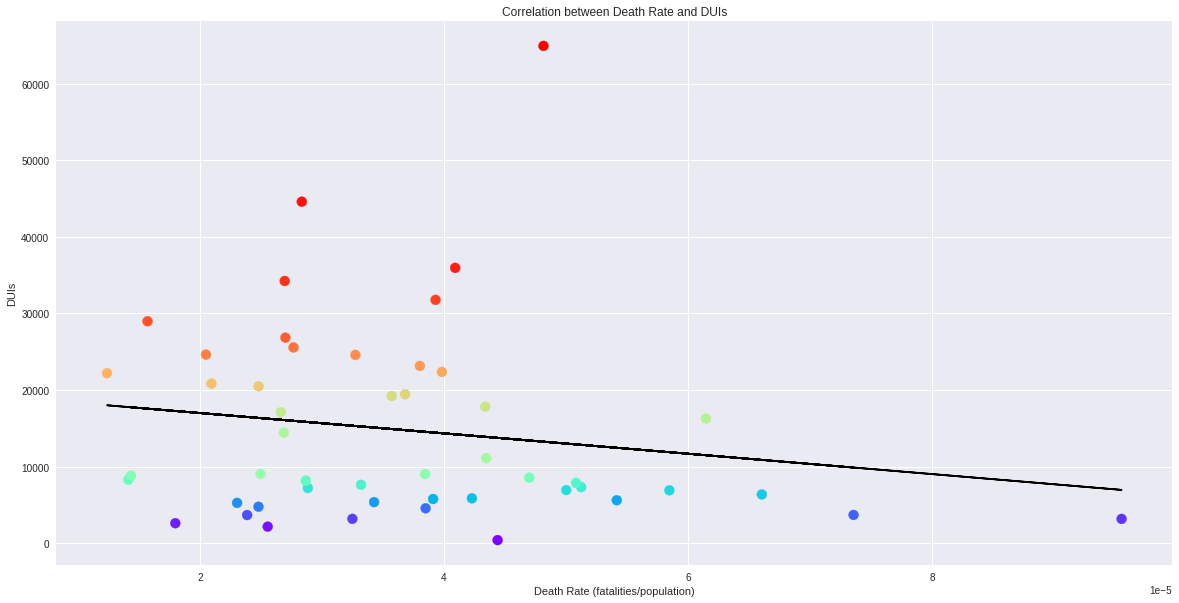

(0.8093749387080006, 1.936556866774875e-12)

In [70]:
#Plot correlation between Death Rate and Population 
#Let's remove the outlier of California and replot

plt.style.use('seaborn')

x = np.arange(49)
ys = [i+x+(i*x)**2 for i in range(49)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))                                 #Set rainbow colors

plt.figure(figsize=(20,10))
plt.scatter(dui_remove_outliers.Death_Rate, dui_remove_outliers.DUI, s = 100, c = colors)

plt.xlabel('Death Rate (fatalities/population)')
plt.ylabel('DUIs')
plt.title('Correlation between Death Rate and DUIs')
m, b = np.polyfit(dui_remove_outliers['Death_Rate'], dui_remove_outliers.DUI, 1)
plt.plot(dui_remove_outliers['Death_Rate'], m*dui_remove_outliers['Death_Rate'] + b, color = 'k')

plt.show()

stats.pearsonr(dui_remove_outliers['Fatalities'], dui_remove_outliers['DUI'])

#Removing California as an outlier improves our correlation coefficient (0.77 raises to 0.81) and lowers our p-value
#Why is the graph still displaying a downward trend?

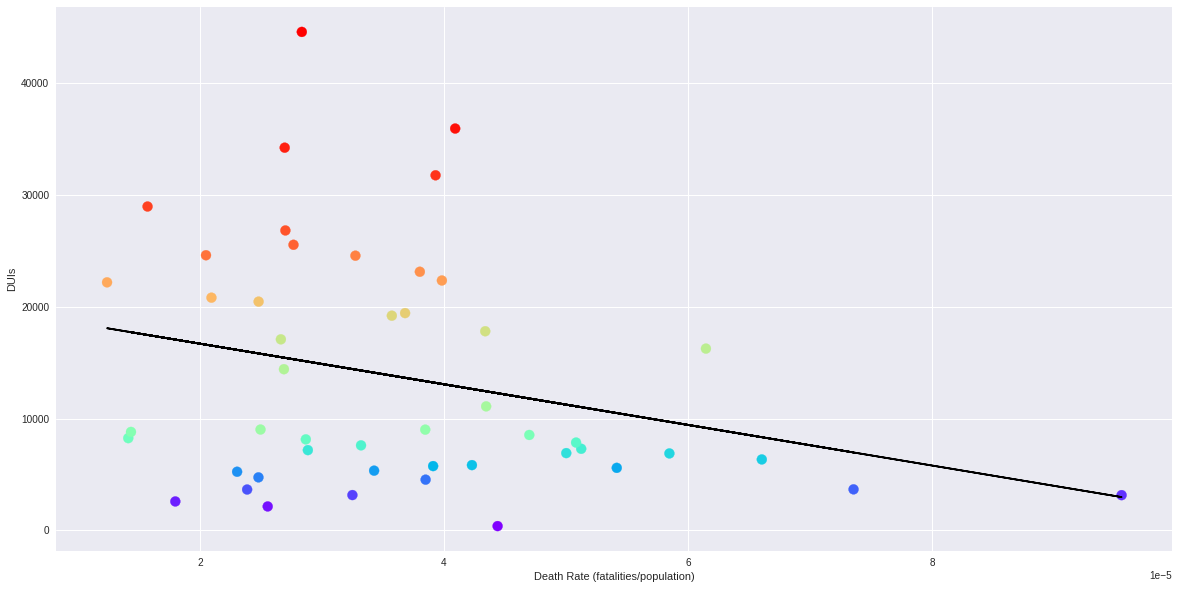

(0.7021804013988965, 2.672619981908965e-08)

In [73]:
#Plot correlation between Death Rate and Population 
#Let's remove the top two outliers of California and Texas and replot

plt.style.use('seaborn')
x = np.arange(48)
ys = [i+x+(i*x)**2 for i in range(48)]
colors = cm.rainbow(np.linspace(0, 1, len(ys))) #set rainbow colors
dui_remove_two_outliers = dui[dui['DUI']<=60000]

plt.figure(figsize=(20,10))
death_rate2 = dui_remove_two_outliers.Fatalities/dui_remove_two_outliers.Population
plt.scatter(death_rate2, dui_remove_two_outliers.DUI, s = 100, c = colors)
#print(np.corrcoef(death_rate2, dui_remove_two_outliers.DUI))

plt.xlabel('Death Rate (fatalities/population)')
plt.ylabel('DUIs')
#plt.title('Correlation between Death Rate and DUIs')
m, b = np.polyfit(death_rate2, dui_remove_two_outliers.DUI, 1)
plt.plot(death_rate2, m*death_rate2 + b, color = 'k')


plt.show()

stats.pearsonr(dui_remove_two_outliers['Fatalities'], dui_remove_two_outliers['DUI'])
#Removing the second outlier, Texas, along with California does not necessarily improve our correlation, but still displays a strong correlation coefficient.
#Why is the graph still displaying a downward trend?
#What if we removed the bottom right outlier instead (the highest death rate)? 
#Wyoming displays the highest death rate at 0.000096

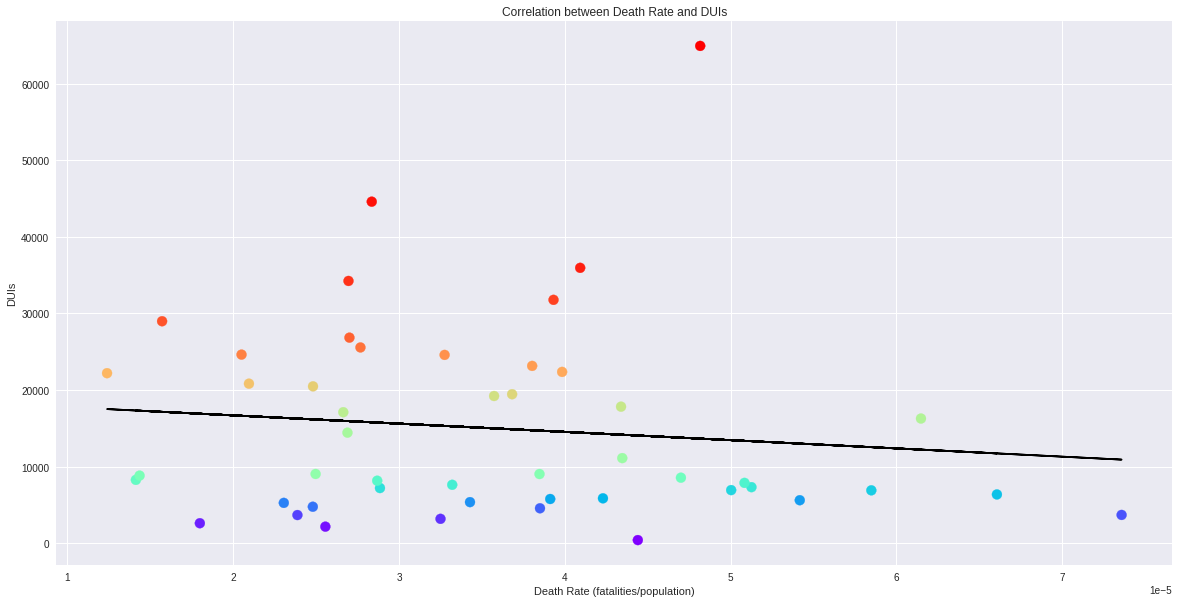

(0.8077579816422312, 3.97154847757383e-12)

In [74]:
#Plot correlation between Death Rate and Population 
#Let's remove both outliers of California (highest DUIs) and Wyoming (highest Death Rate) and replot

plt.style.use('seaborn')

x = np.arange(48)
ys = [i+x+(i*x)**2 for i in range(48)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))                                 #Set rainbow colors

dui_remove_California_Wyoming = dui[np.logical_and(dui.index!='Wyoming', dui.index!='California')]

plt.figure(figsize=(20,10))
death_rate2 = dui_remove_California_Wyoming.Fatalities/dui_remove_California_Wyoming.Population
plt.scatter(death_rate2, dui_remove_California_Wyoming.DUI, s = 100, c = colors)

plt.xlabel('Death Rate (fatalities/population)')
plt.ylabel('DUIs')
plt.title('Correlation between Death Rate and DUIs')
m, b = np.polyfit(death_rate2, dui_remove_California_Wyoming.DUI, 1)
plt.plot(death_rate2, m*death_rate2 + b, color = 'k')


plt.show()

stats.pearsonr(dui_remove_California_Wyoming['Fatalities'], dui_remove_California_Wyoming['DUI'])
#Removing both outliers of California (highest DUIs) and Wyoming (highest Death Rate) raises the correlation coefficient back to 0.81 and lowers the p-value
#With a p-value still less than 0.5, we are confident to reject the null hypothesis and accept the alternate hypothesis that there is a correlation between Death Rate and DUIs

In [ ]:
#Plot side by side for further analysis

plt.style.use('seaborn')

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20,15) 
fig.autofmt_xdate(rotation=90)

#death_rate = fatalities/population
ax[0,0].plot(dui.index, dui.Fatalities/dui.Population, 'go-')
ax[0,0].set_ylabel('Death Rate')
ax[0,0].title.set_text('Death Rate by State')

ax[0,1].plot(dui.index, dui.Population, 'r*-' )
ax[0,1].set_ylabel('Population')
ax[0,1].title.set_text('Population by State')

ax[1,0].plot(dui.index, dui.DUI, 'bv-')
ax[1,0].set_xlabel('State')
ax[1,0].set_ylabel('DUIs')
ax[1,0].title.set_text('Total DUIs by State')

ax[1,1].plot(dui.index, dui.Fatalities, 'yD-')
ax[1,1].set_xlabel('State')
ax[1,1].set_ylabel('Fatalities')
ax[1,1].title.set_text('Fatalities by State')

ax[0,0].set_xticks([])           
ax[0,1].set_xticks([])

plt.show()
#States with higher populations yield lower death rates (fatalities/population) as the larger populations offset number of deaths.
#States with higher populations generally yield more total DUIs and fatalities (California is an outlier with fatalities only equal to 914 - represents last point on yellow graph that dips down)
#Peak in green Death Rate graph represents Wyoming outlier (high number of fatalities (56) relative to its population (586107))

###**Hypothesis 2**

I hypothesize that states with Sunday Sales that are either permitted or local receive more DUIs and fatalities than states with Sunday Sales that are restricted or prohibited. 

I hypothesize that States with prohibited Sunday Sales receive the least number of DUIs.


                 DUI  Fatalities  Population  Death_Rate
Sunday_Sales                                            
Local         249995        3621   115359979    0.000685
Permitted     348363        2798   109606822    0.000559
Prohibited    197671        3246    73263687    0.000495
Restricted     69838         604    22516104    0.000078


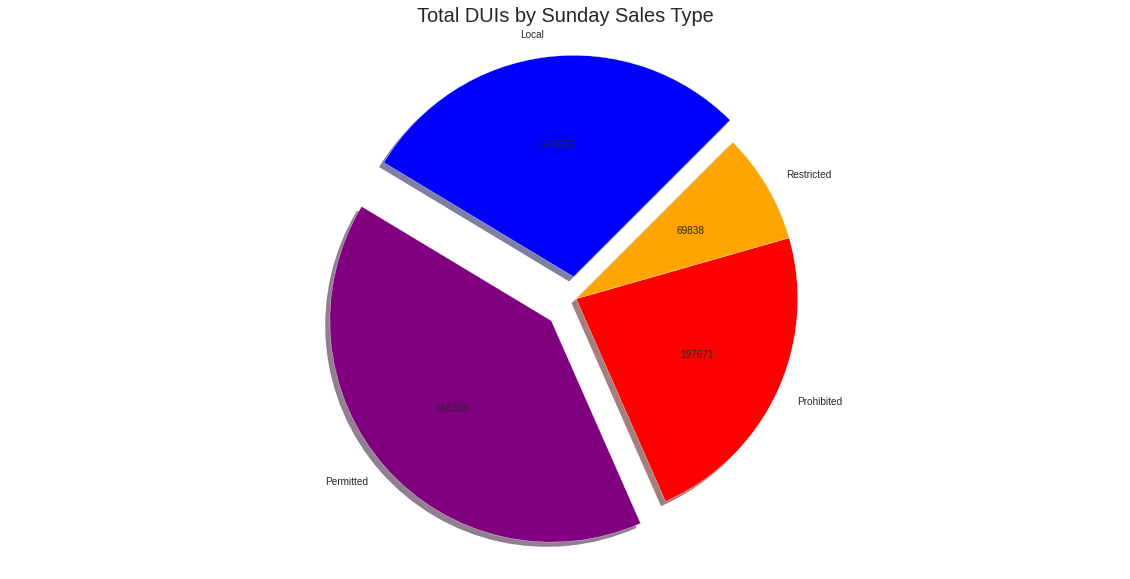

In [78]:
#Let's create a pie chart to visualize the break down of total DUIs per Region

plt.style.use('seaborn')
dui_Sunday_Sales = dui.groupby('Sunday_Sales').sum()   #Group total DUIs by Sunday Sales
print(dui_Sunday_Sales)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
plt.figure(figsize=(20,10))                #format pie chart and print total DUI values on graph

labels = dui_Sunday_Sales.index
plt.pie(dui_Sunday_Sales.DUI, labels = labels, startangle=45,explode=[0.10, 0.15, 0, 0], autopct=autopct_format(dui_Sunday_Sales.DUI), shadow=True, colors = ['blue', 'purple', 'red', 'orange'])
plt.title('Total DUIs by Sunday Sales Type', size = 20)
plt.axis('equal')
plt.show()

#From Hypothesis #2, we can reject that prohibited Sunday Sales states receive the lowest DUIs as Restricted Sunday Sales states yield the lowest total DUIs
#From Hypothesis #2, we can accept that Local and Permitted Sunday Sales types receive the most number of DUIs

In [10]:
#Separate data by Region and store in corresponding variables

permitted = dui[dui['Sunday_Sales']=='Permitted']
print(permitted['DUI'].describe())

local = dui[dui['Sunday_Sales']=='Local']
print(local['DUI'].describe())

prohibited = dui[dui['Sunday_Sales']=='Prohibited']
print(prohibited['DUI'].describe())

restricted = dui[dui['Sunday_Sales']=='Restricted']
print(restricted['DUI'].describe())

count        17.000000
mean      20491.941176
std       32733.695486
min         386.000000
25%        3163.000000
50%        9028.000000
75%       24588.000000
max      141458.000000
Name: DUI, dtype: float64
count       19.000000
mean     13157.631579
std       9583.861210
min       3659.000000
25%       6635.000000
50%       8148.000000
75%      18521.000000
max      34254.000000
Name: DUI, dtype: float64
count       11.000000
mean     17970.090909
std      18209.561068
min       3674.000000
25%       7376.000000
50%      11101.000000
75%      19711.000000
max      64971.000000
Name: DUI, dtype: float64
count        3.000000
mean     23279.333333
std      20081.685545
min       4746.000000
25%      12611.500000
50%      20477.000000
75%      32546.000000
max      44615.000000
Name: DUI, dtype: float64


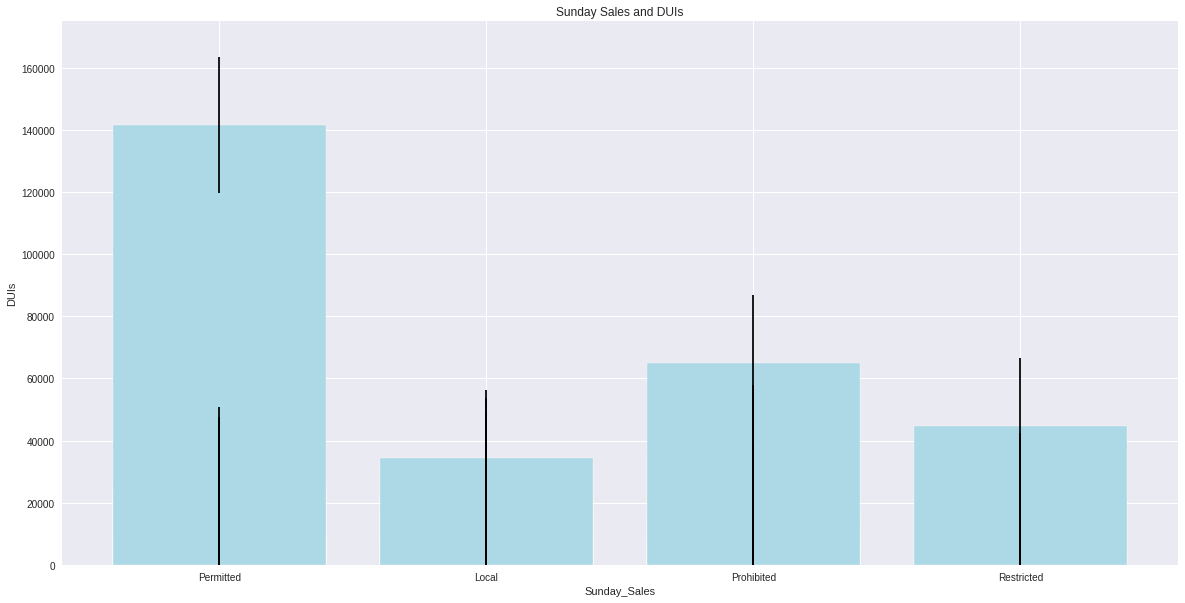

In [75]:
#Let's plot total DUIs grouped by Sunday Sales Type

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.bar(dui.Sunday_Sales, dui.DUI, yerr = dui['DUI'].std(), color='#ADD8E6')    #yerr to add standard deviation lines
plt.ylim(0,175000)
plt.xlabel('Sunday_Sales')
plt.ylabel('DUIs')
plt.title('Sunday Sales and DUIs')
plt.show()

#Even though total DUIs are highest in Permitted and Local states, Local Sunday Sales show the lowest spread while Permitted Sunday sales display the largest spread among values of DUIs
#If we remove California outlier (permitted sales), how will it affect the results?

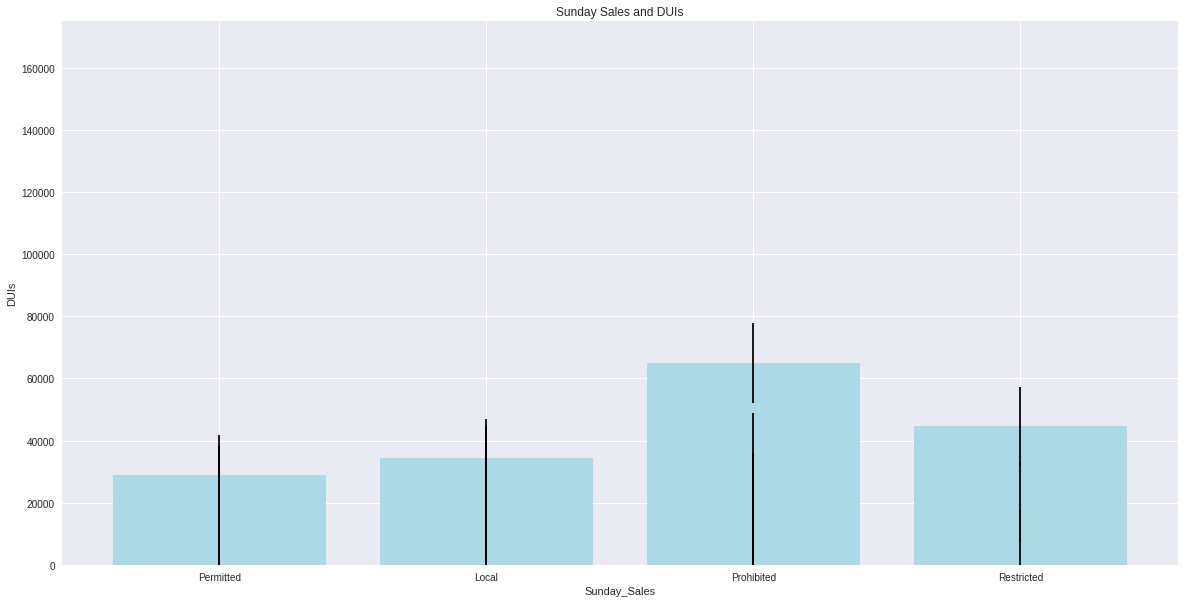

count       49.000000
mean     14783.857143
std      12752.167116
min        386.000000
25%       5756.000000
50%       8813.000000
75%      22201.000000
max      64971.000000
Name: DUI, dtype: float64

In [59]:
#Let's plot total DUIs grouped by Sunday Sales Type (without California outlier) 

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.bar(dui_remove_outliers.Sunday_Sales, dui_remove_outliers.DUI, yerr = dui_remove_outliers['DUI'].std(), color='#ADD8E6')    #yerr to add standard deviation lines
plt.ylim(0,175000)
plt.xlabel('Sunday_Sales')
plt.ylabel('DUIs')
plt.title('Sunday Sales and DUIs')
plt.show()

dui_remove_outliers.DUI.describe()

#When removing the outlier of California (permitted Sunday Sales), we see the the largest spread shift to the Prohibited states mainly due to the second highest outlier of Texas (max DUI 64,971 and prohibited Sunday Sales)

In [ ]:
#Let's create a bar plot to visualize the average of DUIs based on Sunday Sales Type 

fig, ax = plt.subplots()
fig.set_size_inches(20,10) 

ax = sb.barplot(dui.Sunday_Sales, dui.DUI, data = dui)
ax.set_ylabel("DUIs")
ax.set_xlabel("Region")
ax.set_title("Average DUIs by Sunday Sales")
plt.show()

print(permitted['DUI'].describe())
print(local['DUI'].describe())
print(prohibited['DUI'].describe())
print(restricted['DUI'].describe())

#Even though Restricted Sunday Sales yields the lowest total DUIs, it also yields the highest average number of DUIs (23,279) relative to Prohibited Sunday Sales due to its low count of only 3 states
#It is interesting to note that states with Local Sunday Sales yield the lowest average of DUIs (13,158), even compared to Prohibited Sunday Sales (17,970)
#We can confirm that states with Permitted Sunday Sales have the highest standard deviation (32,734), while Local Sales have the minimum standard deviation (9,584)

###**Hypothesis 3**

I hypothesize that states in the South region have the highest number of DUIs.


              DUI  Fatalities  Population  Death_Rate
Region                                               
Midwest    179271        1915    67907403    0.000401
Northeast  127447        1104    56283891    0.000207
South      290061        5115   120510619    0.000698
West       269088        2135    76044679    0.000511


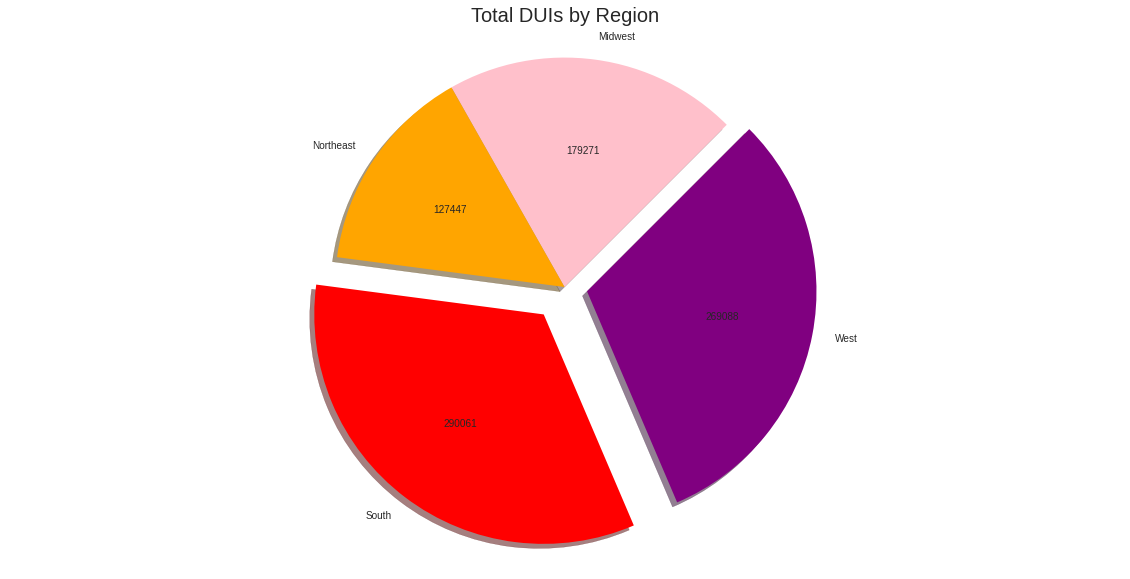

In [50]:
#Let's create a pie chart to visualize the break down of total DUIs per Region

plt.style.use('seaborn')

dui_region = dui.groupby('Region').sum()  #Group sum of DUI by Region and store in "dui_region"
print(dui_region)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
plt.figure(figsize=(20,10))                #format pie chart and print total DUI values on graph

labels = dui_region.index
plt.pie(dui_region.DUI, labels = labels, startangle=45,explode=[0, 0, 0.15, 0.10], autopct=autopct_format(dui_region.DUI), shadow=True, colors = ['pink', 'orange', 'red', 'purple'])
plt.title('Total DUIs by Region', size = 20)
plt.axis('equal')
plt.show()

#From Hypothesis #3, we can confirm that the South region yields the most DUIs at 290,061
#The West region ranks 2nd highest at 269,088 DUIs
#How can we further investigate the South and West regions?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


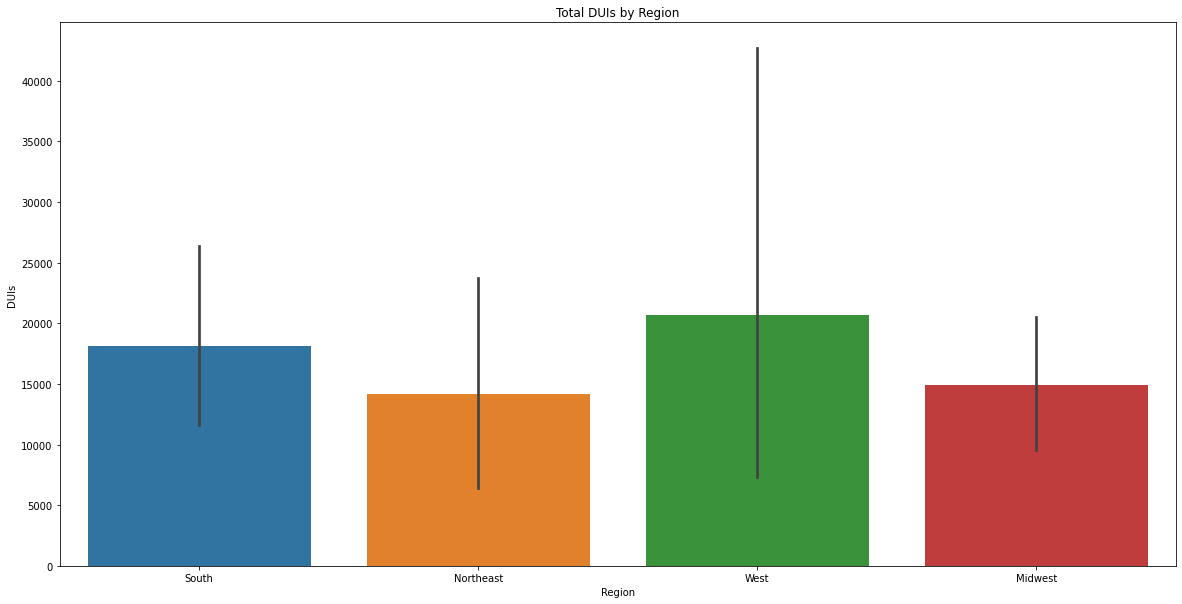

In [12]:
#Let's create a barplot to compare average DUIs by Region

fig, ax = plt.subplots()
fig.set_size_inches(20,10) 

ax = sb.barplot(dui.Region, dui.DUI, data = dui)
ax.set_ylabel("DUIs")
ax.set_xlabel("Region")
ax.set_title("Total DUIs by Region")
plt.show()

#With all data points, the West Region shows the highest average number of DUIs, followed by the South Region à Why?
#How is it that the West region yields higher average number of DUIs, while the South region yields the highest total DUIs?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


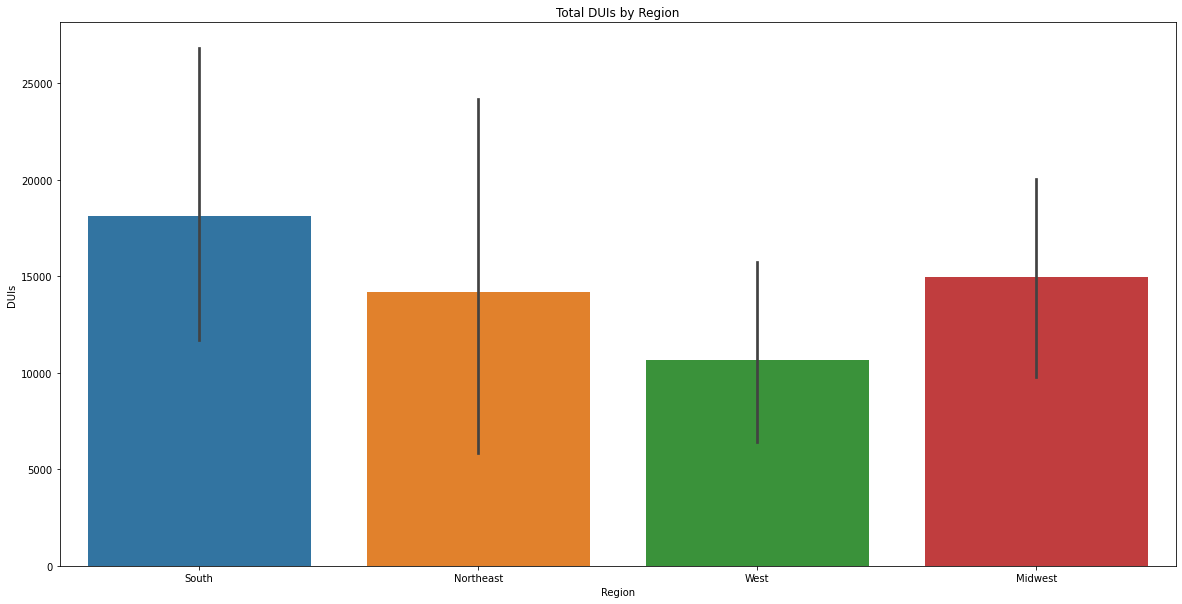

In [13]:
#Remote California outlier and replot to see if it's a confounding variable

dui_remove_outliers = dui[dui.index!='California']

fig, ax = plt.subplots()
fig.set_size_inches(20,10) 
ax = sb.barplot(dui_remove_outliers.Region, dui_remove_outliers.DUI, data = dui_remove_outliers)
ax.set_ylabel("DUIs")
ax.set_xlabel("Region")
ax.set_title("Total DUIs by Region")
plt.show()

#Removing the outlier (California), the West average falls below all other regions. The South Region now displays the highest average of DUIs
#Without confounding variable (California), we see a significant impact on the West region's average DUIs (jumps from highest to lowest), signaling that California was a large contributor

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


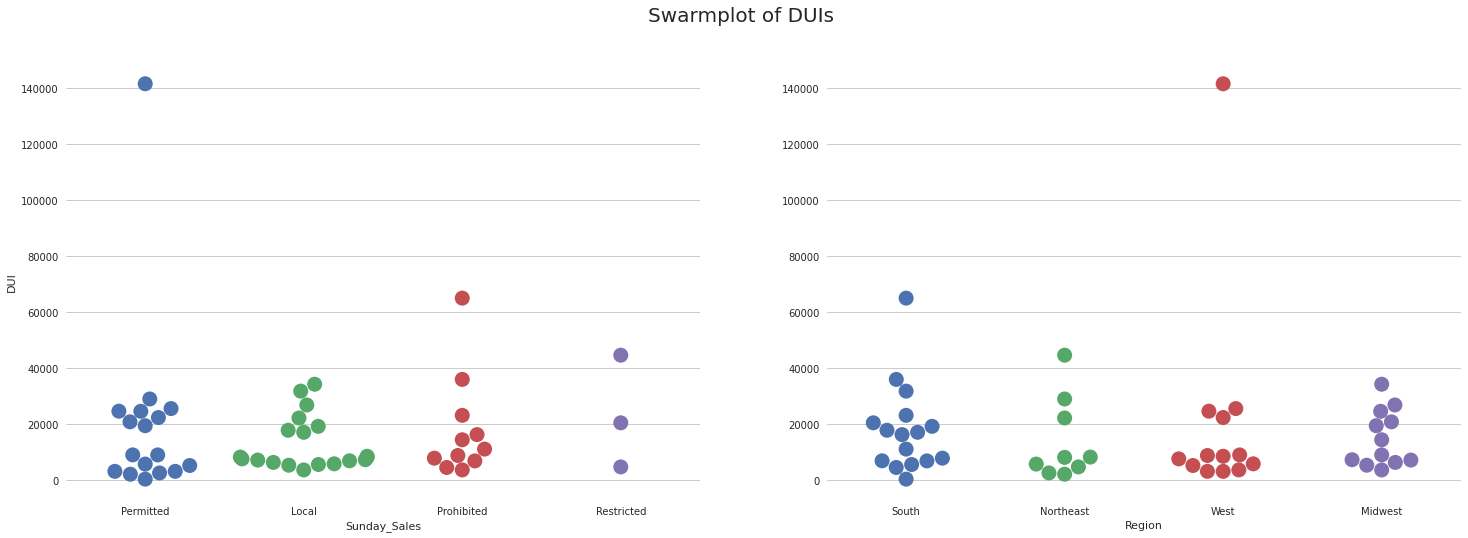

In [63]:
#Combining Hypothesis 2&3
#Let's compare both the Region and Sunday Sales on a Swarmplot

import seaborn as sb
sb.set_style('whitegrid')

fig, ax = plt.subplots(1,2)
fig.set_size_inches(25,8) 

plt.subplot(1, 2, 1)
sb.swarmplot(x = 'Sunday_Sales' , y='DUI', data=dui, size=15) 

plt.subplot(1, 2, 2)
sb.swarmplot(x = 'Region' , y='DUI', data=dui, size=15) 
plt.ylabel("")   

plt.suptitle('Swarmplot of DUIs', size=20)    
plt.show()

#Combining Hypothesis #2 and #3, the most DUIs occur in states with Permitted Sunday Sales, and from states in the Southern region.
#The outlier on both Swam plots is California (Permitted Sunday Sales and West Region)

###**Hypothesis 3 (continued)**

I hypothesize that that states with populations below the median population (4,547,908) have fewer DUIs reported by drunk drivers.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


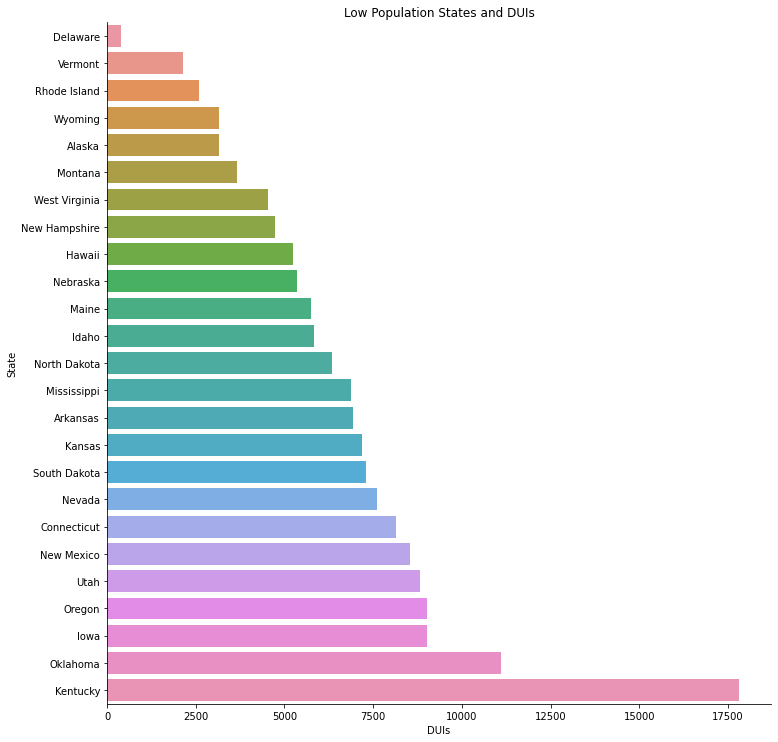

In [26]:
#Let's plot Low Population states compared to total DUIs

#Store high and low population classes in variables
low_population = dui[dui['Population_Class']=='Low Population']
high_population = dui[dui['Population_Class']=='High Population']

ax= sb.catplot(low_population['DUI'], low_population.index , data = low_population, kind='bar', height=10, aspect=15/14)
plt.title ('Low Population States and DUIs')
plt.xlabel('DUIs')
plt.ylabel('State')
plt.show()

In [ ]:
#Let's plot High Population states compared to total DUIs

#Store high and low population classes in variables
low_population = dui[dui['Population_Class']=='Low Population']
high_population = dui[dui['Population_Class']=='High Population']

ax= sb.catplot(high_population['DUI'], high_population.index , data = high_population, kind='bar', height=10, aspect=15/14)

plt.title ('High Population States and DUIs')
plt.xlabel('DUIs')
plt.ylabel('State')
plt.show()

stats.ttest_ind(low_population['DUI'], high_population['DUI'])
#When running a test statistic between high / low populations and total DUIs, we receive a p-value less than 0.5
#Thus, we reject the null Hypothesis #3 and accept the alternate that higher population states receive more total DUIs
#What if we were to remove the California outlier? Would this lead to less statistically significant results? (aka High population states don't necessarily yield more DUIs than Low population states)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


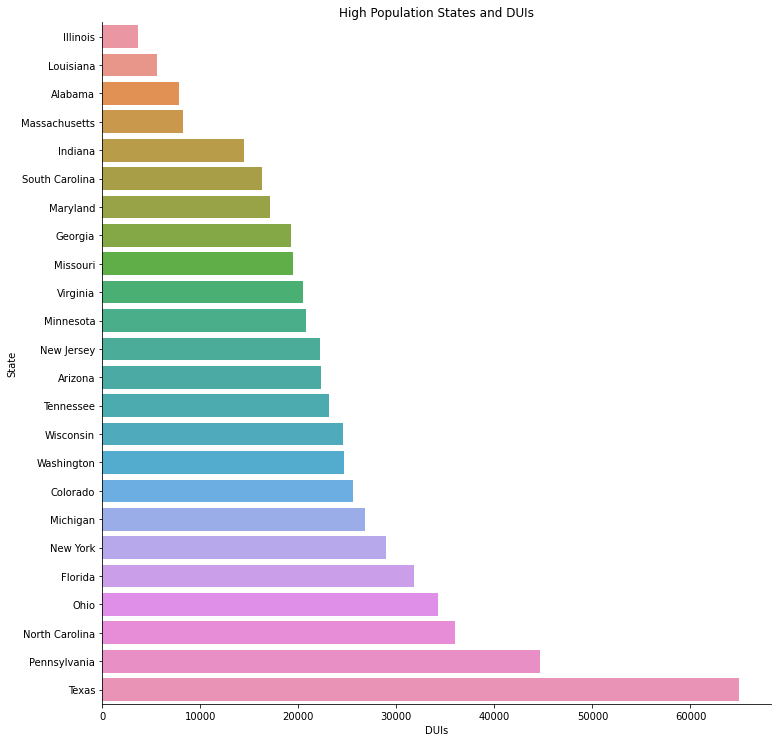

In [21]:
#Remove outlier of California from high population and replot
high_remove_outliers = high_population[high_population.index!='California']

ax= sb.catplot(high_remove_outliers['DUI'], high_remove_outliers.index , data = high_remove_outliers, kind='bar', height=10, aspect=15/14)
plt.title ('High Population States and DUIs')
plt.xlabel('DUIs')
plt.ylabel('State')
plt.show()

In [22]:
#Re-run test statistic with low population and high population (without California outlier)
stats.ttest_ind(low_population['DUI'], high_remove_outliers['DUI'])

#Removing the California yields a different test statistic between high / low populations and total DUIs.
#We receive an even smaller p-value that is still < 0.5
#Thus, even without the high outlier of California, we still reject the null Hypothesis #3 and accept the alternate that higher population states receive more total DUIs

Ttest_indResult(statistic=-6.24850298585821, pvalue=1.1309687692689064e-07)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


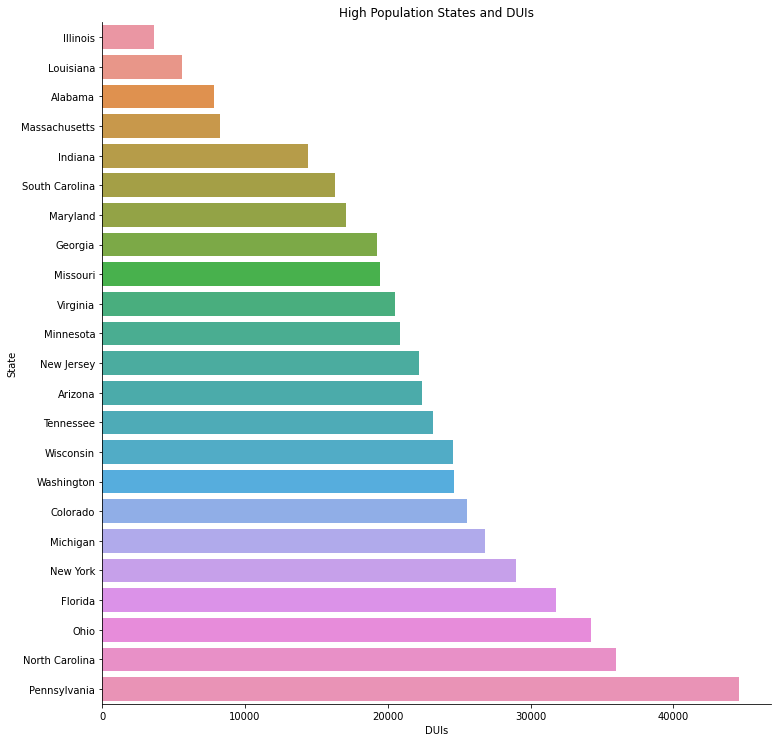

In [25]:
#What if we removed the top two outliers from the high population to see if there is a different result?
#Remove both outliers of California and Texas from high population and replot

high_remove_two_outliers = high_population[high_population['DUI']<=60000]

ax= sb.catplot(high_remove_two_outliers['DUI'], high_remove_two_outliers.index , data = high_remove_two_outliers, kind='bar', height=10, aspect=15/14)

plt.title ('High Population States and DUIs')
plt.xlabel('DUIs')
plt.ylabel('State')
plt.show()

In [24]:
#Re-run test statistic with low population and high population (without both California and Texas outliers)
stats.ttest_ind(low_population['DUI'], high_remove_two_outliers['DUI'])

#Removing the top two outliers of California and Texas yields a slightly different test statistic between high / low populations and total DUIs.
#We receive a slightly smaller p-value that is still < 0.5
#Thus, even without the high outliers, we are still confident to reject the null Hypothesis #3 and accept the alternate that higher population states receive more total DUIs

Ttest_indResult(statistic=-7.186939650753479, pvalue=4.781042750005557e-09)

### **Conclusions**

California displays an abnormally high number of DUIs, representing a confounding variable and skewing some outputs to favor the West region/high population states.

There is generally a strong positive correlation between total fatalities and total DUIs. There is also a positive correlation between death rate (fatalities/population) and total DUIs.

Permitted Sunday Sales yield the most DUIs, followed by Local and Prohibited. However, Local Sunday Sales return the lowest average number DUIs and smallest standard deviation, indicating a more even distribution among its 19 states.

The most DUIs occur in the South region and in states with high population (>4,547,908)
